# Logistic Regression实现对泰坦尼克号问题的分类

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import csv

In [2]:
data=pd.read_csv('train.csv')
age_average=np.mean(data.iloc[:,5])
data.iloc[:,5].fillna(age_average,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_array=np.array(data)
data_array[data_array=='female']=0
data_array[data_array=='male']=1
data_array[:,1][data_array[:,1]==0]=-1
data_array=np.concatenate((data_array, np.ones([891, 1])), axis=1)
x=np.empty([891,6])
x[:,0]=data_array[:,2].astype(float)
x[:,1:5]=data_array[:,4:8].astype(float)
x[:,5]=data_array[:,12].astype(float)
random_list=random.sample(range(0,891),891)
train_x=x[random_list[0:700],:]
test_x=x[random_list[700:891],:]
train_y=data_array[random_list[0:700],1].astype(float)
test_y=data_array[random_list[700:891],1].astype(float)
w=np.zeros([1,6]).astype(float)
iter_time=10000
adagrad=np.zeros([1,6])
learning_rate=1
loss=np.empty(iter_time)
eps=0.00000000000000001
for t in range(iter_time):
    loss[t]=-np.sum(np.log(1.0/(1.0+np.exp(-np.multiply(train_y,np.dot(w,train_x.T))))))
    gradient=np.dot(np.multiply(-1.0/(1+np.exp(np.multiply(train_y,np.dot(w,train_x.T)))),train_y),train_x)
    adagrad=adagrad+gradient**2
    w=w-learning_rate*gradient/np.sqrt(adagrad+eps)  

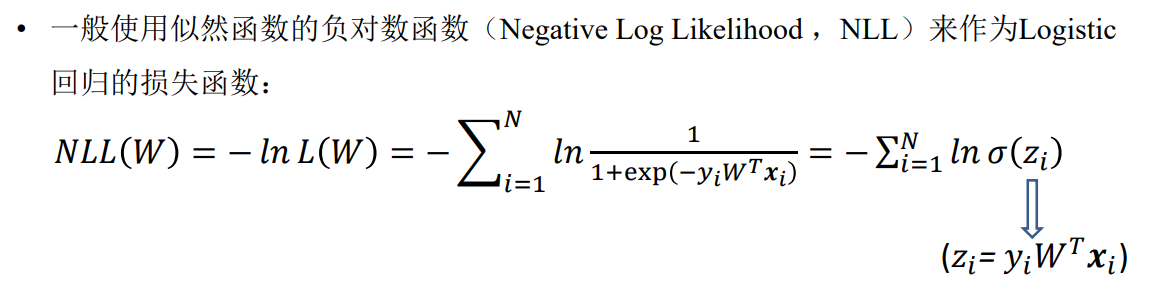
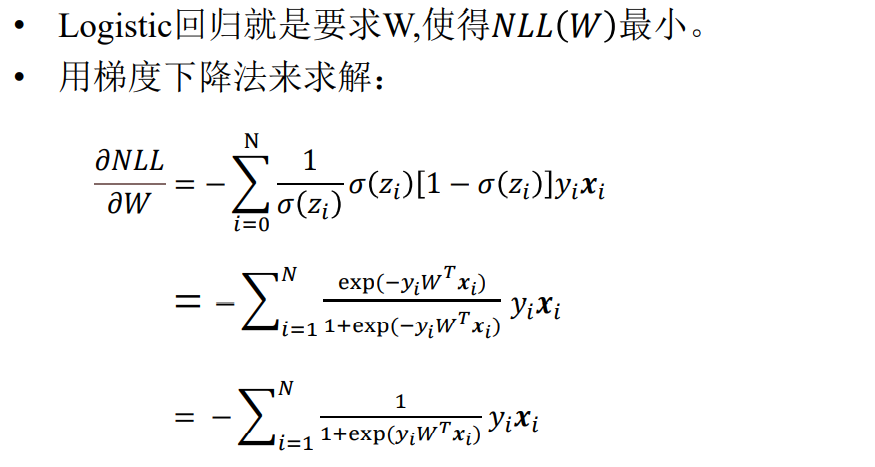
步长的更新采用adagrad算法
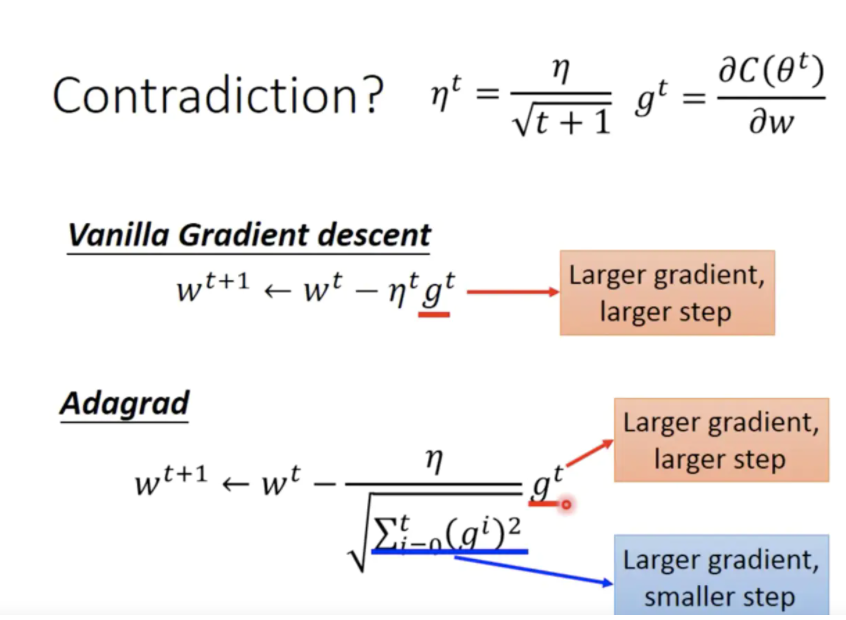

预测活人的正确率为0.7916666666666666
预测死人的正确率为0.8319327731092436


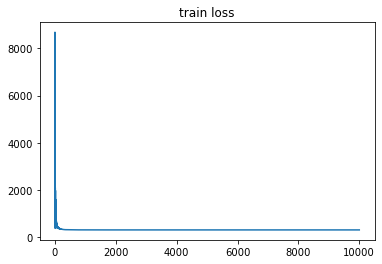

In [4]:
for_y=1.0/(1.0+np.exp(-np.dot(w,test_x.T)))
for_y[for_y>=0.5]=1
for_y[for_y<0.5]=-1
err_y=for_y-test_y
print('预测活人的正确率为'+str(1-len(err_y[err_y==2])/len(for_y[for_y==1])))
print('预测死人的正确率为'+str(1-len(err_y[err_y==-2])/len(for_y[for_y==-1])))
xx=range(0,iter_time)
plt.title('train loss')
plt.plot(xx,loss) 
plt.show() 

In [5]:
tdata=pd.read_csv('test.csv')
tage_average=np.mean(tdata.iloc[:,4])
tdata.iloc[:,4].fillna(tage_average,inplace=True)
tdata_array=np.array(tdata)
tdata_array[tdata_array=='female']=0
tdata_array[tdata_array=='male']=1
tdata_array=np.concatenate((tdata_array,np.ones([418,1])), axis=1)
tx=np.empty([418,6])
tx[:,0]=tdata_array[:,1]
tx[:,1:5]=tdata_array[:,3:7]
tx[:,5]=tdata_array[:,11]
ty=1.0/(1.0+np.exp(-np.dot(w,tx.T)))
ty[ty>=0.5]=1
ty[ty<0.5]=0
f = open('submission.csv','w',encoding='utf-8',newline="")
csv_writer = csv.writer(f)
csv_writer.writerow(["PassengerId","Survived"])
for i in range(418):
    csv_writer.writerow([i+1,ty[0,i]])
f.close()

文件上传到LintCode，结果如下
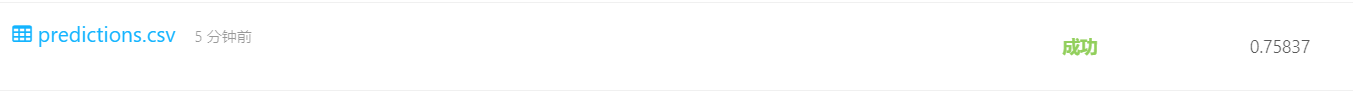